In [7]:
import platform
import numpy as np
import matplotlib.pyplot as plt
import math
import skimage
from skimage import data
from skimage.feature import match_template



platform.architecture()[0]

'64bit'

In [ ]:
# B70 2nd setup
def convert_B70_2nd(H,V,marks,margin=[100,100,100,100],samplesize=3000,displayFig=True):
    """
    [um]    
    alignment marks [topleft_H,topleft_V, topright_H, topright_V]
    Return:
    coordinates (row,column) relative to topleft corner, where topleft topright marks are on the same horizontal line
    if displayFig, display the coordinates in lab frame and sample frame
    """
    markyy = marks[3]-marks[1]
    markxx = -(marks[2]-marks[0])
    theta = np.arctan2(markyy,markxx)
    yy = V - marks[1]
    xx = -(H-marks[0])
    
    c, s = np.cos(-theta), np.sin(-theta)
    R = np.array(((c,-s), (s, c)))
    
    v = np.array((xx,yy))
    vrot = R.dot(v)

In [1]:
leoCmarks=[2000,32,21,42]

In [2]:
theta = np.arctan2(          )

2000

In [5]:
np.arctan2(2,1)

1.1071487177940904

In [6]:
np.tan(1.107)

1.9992566321281273

In [51]:
marks = [7000,6000, 4132,7000]
H = 5231
V = 6000

TLh,TLv,TRh,TRv = marks



markyy = marks[3]-marks[1]
markxx = -(marks[2]-marks[0])




theta = np.arctan2(markyy,markxx)
yy = V - marks[1]
xx = -(H-marks[0])

c, s = np.cos(-theta), np.sin(-theta)
R = np.array(((c,-s), (s, c)))

v = np.array((xx,yy))
vrot = R.dot(v)

vecTR = np.array((markxx,markyy))
vecTRrot = R.dot(vecTR)
samplesize=3000

5566.0


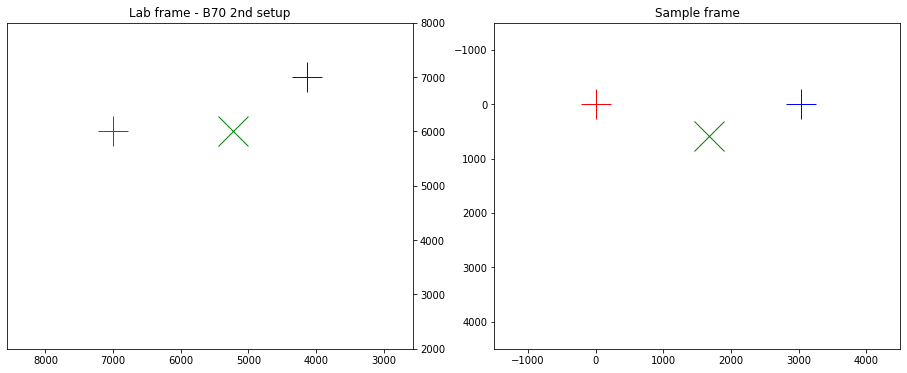

In [54]:
image = data.coins() # full image
coin = image[170:220, 75:130] # coin template

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
# ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)
# image = image*0+255

# ax1.imshow(coin, cmap=plt.cm.gray)

# ax1.set_axis_off()

ax1.set_title('Lab frame - B70 2nd setup')
centerh = (TLh+TRh)/2
print(centerh)
centerv = (TLv+TRv)/2 -samplesize/2
ax1.plot(TLh, TLv, '+', markeredgecolor='r', markerfacecolor='none', markersize=30)

ax1.plot(TRh, TRv, '+', markeredgecolor='b', markerfacecolor='none', markersize=30)
ax1.plot(H, V, 'x', markeredgecolor='g', markerfacecolor='none', markersize=30)

ax1.set_xlim(centerh+samplesize,centerh-samplesize)
ax1.set_ylim(centerv-samplesize,centerv+samplesize)
ax1.yaxis.tick_right()

# row column
# ax2.imshow(image, cmap=plt.cm.gray)
# ax2.set_axis_off()
ax2.set_title('Sample frame')
# highlight matched region

# column, row := x,-y
ax2.plot(0, 0, '+', markeredgecolor='r', markerfacecolor='none', markersize=30)

ax2.plot(vecTRrot[0], -vecTRrot[1], '+', markeredgecolor='b', markerfacecolor='none', markersize=30)
ax2.plot(vrot[0], -vrot[1], 'x', markeredgecolor='g', markerfacecolor='none', markersize=30)

ax2.set_xlim(-samplesize/2.,1.5*samplesize)
ax2.set_ylim(1.5*samplesize,-samplesize/2.)

hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
# ax2.add_patch(rect)

# ax2.plot(x, y, '+', markeredgecolor='r', markerfacecolor='none', markersize=30)


# ax3.imshow(result)
# # ax3.set_axis_off()
# ax3.set_title('`match_template`\nresult')
# # highlight matched region
# ax3.autoscale(False)
# ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

In [43]:
vrot

array([1659.07375976, -783.58423905])

In [15]:
image=image*0

In [20]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

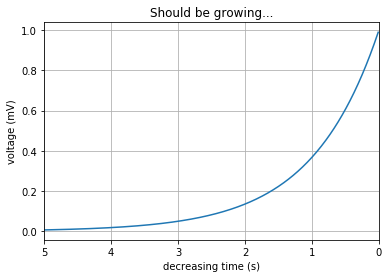

In [26]:
# https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/invert_axes.html
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s = np.exp(-t)

fig, ax = plt.subplots()

ax.plot(t, s)
ax.set_xlim(5, 0)  # decreasing time
ax.set_xlabel('decreasing time (s)')
ax.set_ylabel('voltage (mV)')
ax.set_title('Should be growing...')
ax.grid(True)

plt.show()

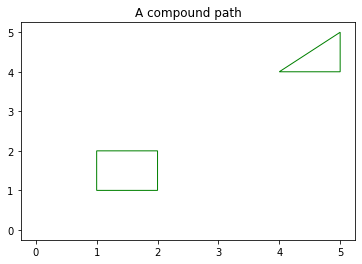

In [48]:
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt


vertices = []
codes = []

codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = [(1, 1), (1, 2), (2, 2), (2, 1), (0, 0)]

codes += [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices += [(4, 4), (5, 5), (5, 4), (0, 0)]

vertices = np.array(vertices, float)
path = Path(vertices, codes)

pathpatch = PathPatch(path, facecolor='None', edgecolor='green')

fig, ax = plt.subplots()
ax.add_patch(pathpatch)
ax.set_title('A compound path')

ax.autoscale_view()

plt.show()